#### Импортирую библиотеки

In [28]:
import pandas as pd

#### Загружаю таблицу

In [29]:
df = pd.read_csv("/home/karpov/Data_analytics_course/Data_analytics_course/Product_analysis/Cohort_analysis/KC_case_data .csv")

In [30]:
df.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads


In [31]:
df.event.value_counts()

app_start      748705
search         708639
choose_item    538669
tap_basket     377665
app_install    154597
purchase       141383
register        78310
Name: event, dtype: int64

In [32]:
df.date.max()

'2020-03-31'

### Вопрос 1:
MAU февраля?

In [33]:
df.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads


In [34]:
ndf=df

Привожу колонку date к формату datetime

In [35]:
ndf['date'] = pd.to_datetime(ndf['date'])

In [36]:
ndf.dtypes

date            datetime64[ns]
event                   object
purchase_sum           float64
os_name                 object
device_id                int64
gender                  object
city                    object
utm_source              object
dtype: object

Создаю новую колонку, в которой будет указан месяц из колонки date

In [37]:
ndf['month'] = pd.DatetimeIndex(ndf['date']).month

In [38]:
ndf.query('month==2 & event == "app_start"').nunique()

date               29
event               1
purchase_sum        0
os_name             2
device_id       75032
gender              2
city                2
utm_source          7
month               1
dtype: int64

Ответ: MAU февраля: 75032

### Вопрос 2
Количество установок в январе?

In [39]:
ndf_2=df

ndf_2

In [40]:
ndf_2.query('month == 1').event.value_counts()

app_start      268471
search         254732
choose_item    196137
tap_basket     140616
app_install     80297
purchase        59208
register        42946
Name: event, dtype: int64

Ответ: количество установок в январе - 80297

### Вопрос 3
Присвойте пользователям когорты по дню установки приложения и посчитайте для них  конверсию из установки в покупку в течение 7 дней. Для какой когорты конверсия была наибольшей? 

In [108]:
df.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,1
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,1
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,1
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,1
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,1


Отбираю только события установки приложения (app_install), и колонки date и device_id (удаляю дубликаты), переименовываю колонку date на install_date

In [109]:
installs = df.query('event == "app_install"')[['date', 'device_id']]

In [110]:
installs=installs.drop_duplicates('device_id')

In [111]:
installs = installs.rename(columns = {'date':'install_date'})

Присоединяю к датафрейму df датафрейм installs по колонке device_id

In [112]:
data = df.merge(installs, how = 'left', on = 'device_id')

In [113]:
data.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month,install_date
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,1,2020-01-01
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,1,2020-01-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,1,NaT
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,1,2020-01-01
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,1,2020-01-01


Создаю новую колонку с датой первой покупки пользователями

In [114]:
purchases = df.query('event == "purchase"')[['date','device_id']]

In [115]:
purchases = purchases.sort_values('date').drop_duplicates('device_id')

In [116]:
purchases=purchases.rename(columns = {'date':'first_purchase_date'})

In [117]:
purchases

,first_purchase_date,device_id
7691,2020-01-01,6081155
8289,2020-01-01,1955306
8290,2020-01-01,20176327
8291,2020-01-01,28603960
8292,2020-01-01,14028316
...,...,...
2506842,2020-03-31,32122725
2506845,2020-03-31,23188703
2506848,2020-03-31,25732558
2506852,2020-03-31,17778508


Присоединяю данные из таблицы purchase к итоговому датафрейму data

In [118]:
data = data.merge(purchases, how = 'left', on = 'device_id')

In [119]:
data.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month,install_date,first_purchase_date
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,1,2020-01-01,2020-01-07
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,1,2020-01-01,2020-01-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,1,NaT,2020-01-01
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,1,2020-01-01,NaT
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,1,2020-01-01,NaT


Сохраняю датафрейм в формат csv для дальнейшей работы в Tableau

In [ ]:
data.to_csv('KC_results.csv', index = False)

Обработал данные в Tableau

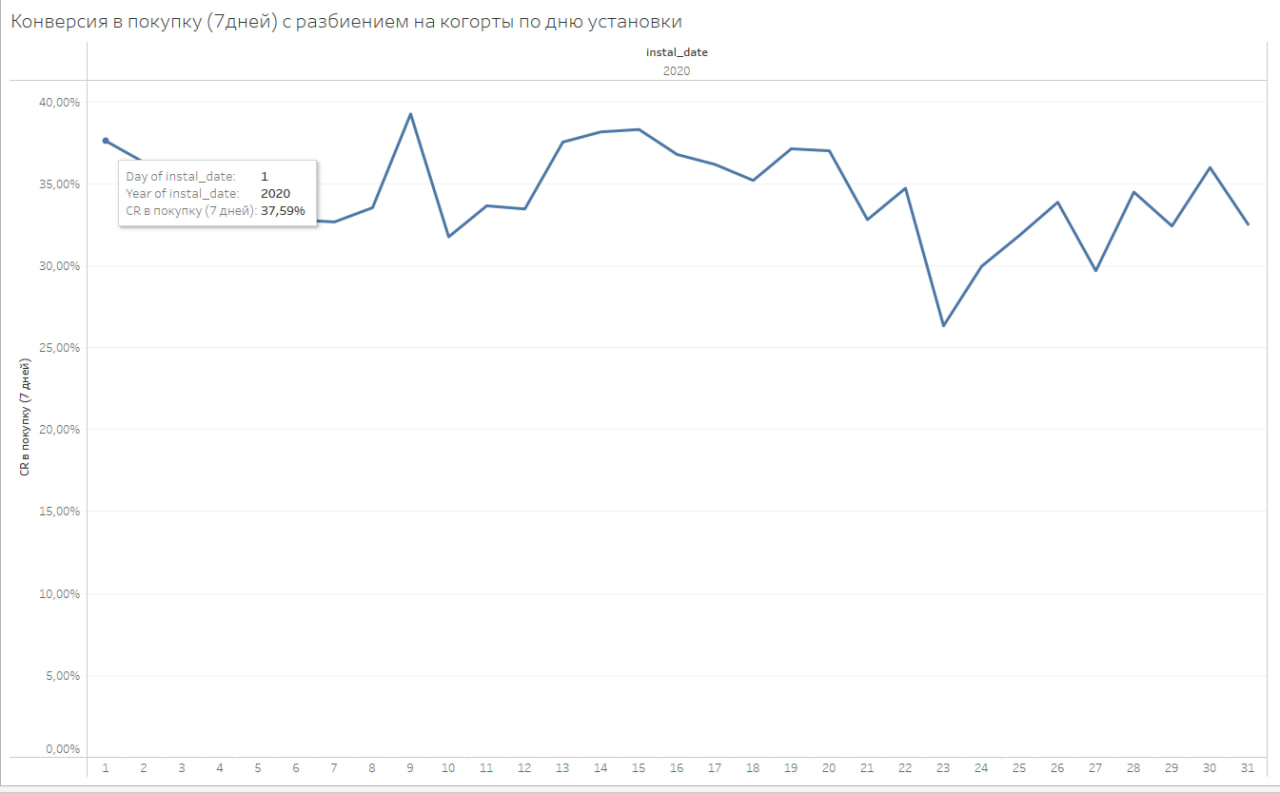

Ответ: Конверсия оказалась наибольшей для когорты 01.01.2020

### Вопрос 4
Укажите значение CR из предыдущего вопроса в %?

Ответ: СR = 37,6 %

### Вопрос 5:
Проанализируйте на каком этапе воронки отваливается бОльшая часть клиентов. Посмотрите отдельно сценарии для зарегистрированных и для незарегистрированных пользователей. На каком шаге отваливается больше всего зарегистрированных пользователей?

In [124]:
registration_date = data.query('event ==  "register"').sort_values('date').drop_duplicates('device_id')

In [134]:
registration_date.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month,install_date,first_purchase_date,days_after_purchase
2669658,2020-01-01,register,NaN,ios,294193,female,Saint-Petersburg,instagram_ads,1,NaT,2020-01-01,NaT
2670356,2020-01-01,register,NaN,ios,21780,female,Saint-Petersburg,yandex-direct,1,2020-01-01,2020-01-01,0 days
2670357,2020-01-01,register,NaN,ios,2470180,male,Moscow,google_ads,1,2020-01-01,2020-01-01,0 days
2670358,2020-01-01,register,NaN,android,3735668,male,Moscow,instagram_ads,1,2020-01-01,2020-01-01,0 days
2670359,2020-01-01,register,NaN,android,11372938,male,Saint-Petersburg,-,1,2020-01-01,2020-01-01,0 days


In [128]:
data['first_registration'] = data['device_id'].map(registration_date.set_index('device_id')['date'])

In [131]:
already_reg = data[data['first_registration']<data['date']] 

In [133]:
already_reg.groupby('event')['device_id'].nunique()

event
app_start      40991
choose_item    37926
purchase       24880
search         40482
tap_basket     34517
Name: device_id, dtype: int64

In [136]:
print("Конверсия в поиск из открытия", round((40482/40991)*100,2))

Конверсия в поиск из открытия 98.76


In [137]:
print("Конверсия в добавление товара из поиска", round((37926/40482)*100,2))

Конверсия в добавление товара из поиска 93.69


In [138]:
print("Конверсия в переход в корзину из добавление товара", round((34517/37926)*100,2))

Конверсия в переход в корзину из добавление товара 91.01


In [139]:
print("Конверсия в покупку из перехода в корзину", round((24880/34517)*100,2))

Конверсия в покупку из перехода в корзину 72.08


Ответ: шаг "Переход в корзину"

### Вопрос 6:
Пользователи, пришедшие с какого канала, имеют медианный первый чек выше? (учитываются только первые покупки пользователей)

In [142]:
purchases = data[data['event'] == 'purchase'][['date','device_id','purchase_sum', 'utm_source']]

In [144]:
purchases = purchases.sort_values('date').drop_duplicates('device_id')

In [146]:
purchases.groupby('utm_source').median()

,device_id,purchase_sum
utm_source,,
-,10972119.0,398.5
facebook_ads,10844491.0,389.0
google_ads,11089575.0,390.5
instagram_ads,11096726.0,393.5
referal,10491527.0,395.5
vk_ads,11334978.0,393.0
yandex-direct,10969061.5,392.5


In [ ]:
Ответ: Реферальная программа

### Вопрос 7:
Данные по затратам на рекламу:

Яндекс – 10 491 707 руб.
Гугл – 10 534 878 руб.
Фейсбук – 8 590 498 руб.
Инстаграм – 8 561626 руб.
ВК – 9 553 531руб.

Расходы на реферальную программу: если пользователь приведет друга и последний совершит первую покупку, то оба получат по 100 рублей.
Какой платный канал имеет самый высокий ROMI?

##### Считаю общую выручку

In [148]:
data.groupby('utm_source')['purchase_sum'].sum()

utm_source
-                21449749.5
facebook_ads     12249901.0
google_ads       12868276.0
instagram_ads    14546969.0
referal           8837044.5
vk_ads           16389652.5
yandex-direct    13915368.0
Name: purchase_sum, dtype: float64

In [151]:
print('ROMI Facebook:', round((12249901/8590498-1)*100,2),"%")
print('ROMI Гугл:', round((12868276/10534878-1)*100,2),"%")
print('ROMI Яндекс:', round((13915368/10491707-1)*100,2),"%")
print('ROMI Инстаграм:', round((14546969/8561626-1)*100,2),"%")
print('ROMI ВК:', round((16389652.5/9553531-1)*100,2),"%")



ROMI Facebook: 42.6 %
ROMI Гугл: 22.15 %
ROMI Яндекс: 32.63 %
ROMI Инстаграм: 69.91 %
ROMI ВК: 71.56 %


Ответ: ВК